#**Uber Sales Data...**

##**Importing Libraries...**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

###**Importing Uber data...**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/python Learning_PW/pandas practice/Uber data/ncr_ride_bookings.csv")

###**Showing the sample data after importing...**

In [ ]:
df.head(2)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI


###**Showing total number of rows & columns...**

In [ ]:
print("Total number of rows & columns: ",df.shape)

Total number of rows & columns:  (150000, 21)


##**Showing info & datatype of the data...**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

###**Changing the datatype of "Date" from "object type" to "date&time type"...**

In [ ]:
df["Date"]=pd.to_datetime(df["Date"],format="%Y-%m-%d",errors="coerce")

###**Checking the datatype again after changing the datatype of date...**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date                               150000 non-null  datetime64[ns]
 1   Time                               150000 non-null  object        
 2   Booking ID                         150000 non-null  object        
 3   Booking Status                     150000 non-null  object        
 4   Customer ID                        150000 non-null  object        
 5   Vehicle Type                       150000 non-null  object        
 6   Pickup Location                    150000 non-null  object        
 7   Drop Location                      150000 non-null  object        
 8   Avg VTAT                           139500 non-null  float64       
 9   Avg CTAT                           102000 non-null  float64       
 10  Cancelled Rides by C

###**Checking the Null values if available...**

In [ ]:
print("Number of null values in each column:")
display(df.isnull().sum())

Number of null values in each column:


,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,10500
Avg CTAT,48000


###**Replacing null values with "0"...**

In [ ]:
df.fillna(0,inplace=True)

###**Checking again after replacing...**

In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,0
Avg CTAT,0


###**Describe the numeric columns...**

In [ ]:
df.describe()

,Date,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,150000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,2024-06-30 16:42:40.320000,7.864407,19.821753,0.070000,0.180000,0.060000,345.641220,16.753168,2.623215,2.730842
min,2024-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024-03-31 00:00:00,4.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2024-07-01 00:00:00,7.800000,22.000000,0.000000,0.000000,0.000000,244.000000,13.060000,3.900000,4.100000
75%,2024-09-30 00:00:00,11.000000,32.900000,0.000000,0.000000,0.000000,521.000000,30.650000,4.300000,4.600000
max,2024-12-30 00:00:00,20.000000,45.000000,1.000000,1.000000,1.000000,4277.000000,50.000000,5.000000,5.000000
std,NaN,4.230640,15.452834,0.255148,0.384189,0.237488,403.423487,16.291118,2.082283,2.165548


#**Descriptive Analysis...**

###**Monthly Sales Trends...**

In [ ]:
df["Monthly Sales Trends"] = df["Date"].dt.strftime('%B')

In [ ]:
# Define the desired order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert the 'Monthaly Sales Trends' column to a categorical type with the specified order
df["Monthly Sales Trends"] = pd.Categorical(df["Monthly Sales Trends"], categories=month_order, ordered=True)

# Group by the categorical month column and count the values, which will now be in chronological order
monthly_sales_ordered = df["Monthly Sales Trends"].value_counts().sort_index()

# Display the sorted monthly sales
display(monthly_sales_ordered)

,count
Monthly Sales Trends,
January,12861
February,11927
March,12719
April,12199
May,12778
June,12440
July,12897
August,12636
September,12248


###**Visualizing Monthaly trends through a line chart...**

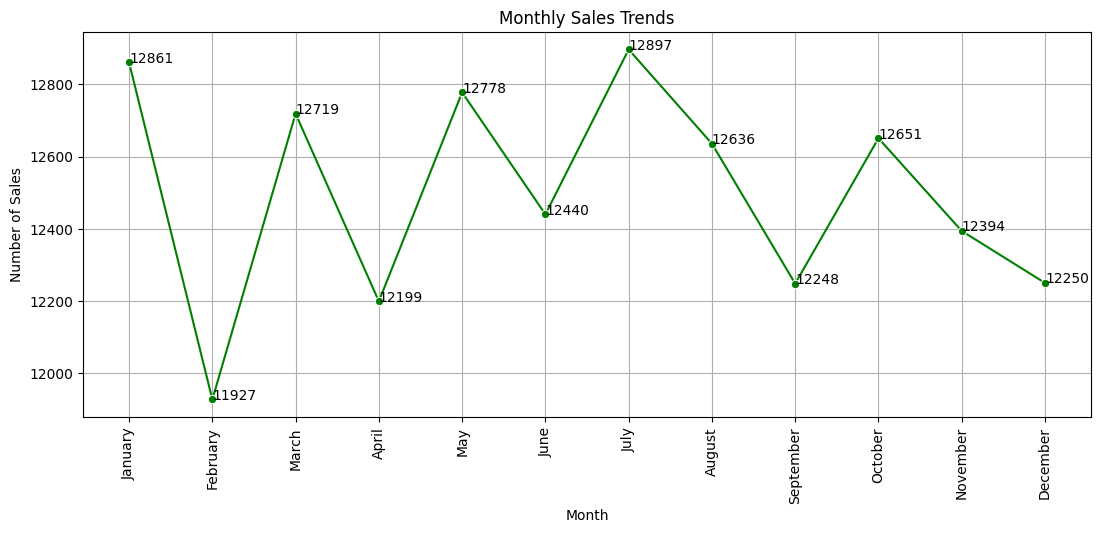

In [ ]:
plt.figure(figsize=(13,5))
monthly_sales = df["Monthly Sales Trends"].value_counts()
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", color="g")
plt.xticks(rotation=90)
plt.grid(True)
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Number of Sales")

for x,y in zip(monthly_sales.index, monthly_sales.values):
    plt.text(x, y, str(y), ha='left')
plt.show()

###**Monthly Avg VTAT & CTAT...**

In [ ]:
#Avg VTAT
Avg_VTAT=df.groupby("Monthly Sales Trends")["Avg VTAT"].mean()

#Avg CTAT
Avg_CTAT=df.groupby("Monthly Sales Trends")["Avg CTAT"].mean()

#Solution
Monthly_df = pd.DataFrame({"Monthly_Avg_VTAT": Avg_VTAT, "Monthly_Avg_CTAT": Avg_CTAT})
display(Monthly_df)

,Monthly_Avg_VTAT,Monthly_Avg_CTAT
Monthly Sales Trends,,
January,7.882046,19.866768
February,7.802708,19.649769
March,7.888262,19.959423
April,7.843569,20.075777
May,7.922351,19.814486
June,7.868352,19.809461
July,7.817167,19.603396
August,7.781141,19.589672
September,7.850661,19.730887


###**Visualizing Monthly Avg VTAT & CTAT through subplot...**

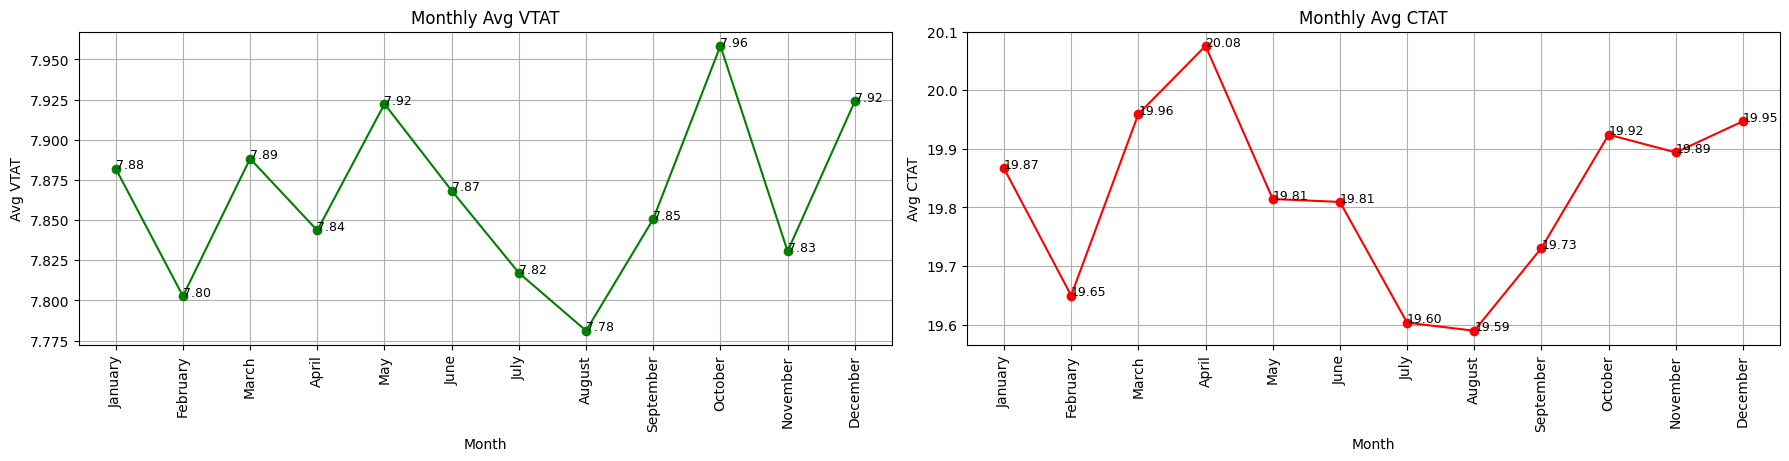

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(2,2,1)
plt.plot(Avg_VTAT.index,Avg_VTAT.values, marker="o", color="g")
plt.xticks(rotation=90)
plt.grid(True)
plt.title("Monthly Avg VTAT")
plt.xlabel("Month")
plt.ylabel("Avg VTAT")
plt.tight_layout()
for x,y in zip(Avg_VTAT.index, Avg_VTAT.values):
    plt.text(x, y, f'{y:.2f}', ha='left',fontsize=9)

plt.subplot(2,2,2)
plt.plot(Avg_CTAT.index, Avg_CTAT.values, marker="o", color="r")
plt.tight_layout()
plt.xticks(rotation=90)
plt.grid(True)
plt.title("Monthly Avg CTAT")
plt.xlabel("Month")
plt.ylabel("Avg CTAT")
plt.tight_layout()

for x,y in zip(Avg_CTAT.index, Avg_CTAT.values):
    plt.text(x, y, f'{y:.2f}', ha='left',fontsize=9)
plt.show()

###**Checking the booking status...**

In [ ]:
Booking_Status=df.groupby("Booking Status")["Booking Status"].count().sort_values(ascending=False)
Booking_Status

,Booking Status
Booking Status,
Completed,93000
Cancelled by Driver,27000
Cancelled by Customer,10500
No Driver Found,10500
Incomplete,9000


###**Visualizing the booking status through a bar chart...**

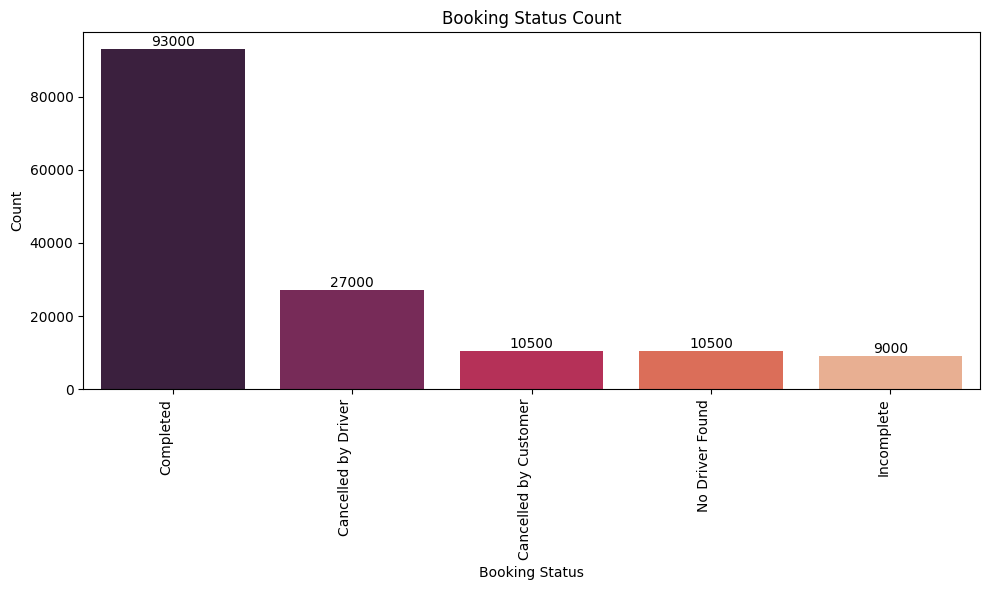

In [ ]:
plt.figure(figsize=(10,6))
a=sns.barplot(x=Booking_Status.index, y=Booking_Status.values, palette="rocket")
plt.title("Booking Status Count")
plt.xlabel("Booking Status")
plt.ylabel("Count")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

for bar in a.patches:
  a.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),f'{bar.get_height():.0f}', ha='center', va='bottom')
plt.show()

###**Checking the vehicle type...**

In [ ]:
Vehicle_Type=df.groupby("Vehicle Type")["Vehicle Type"].count().sort_values(ascending=False)
Vehicle_Type

,Vehicle Type
Vehicle Type,
Auto,37419
Go Mini,29806
Go Sedan,27141
Bike,22517
Premier Sedan,18111
eBike,10557
Uber XL,4449


###**Visualizing vehicle type through pie chart...**

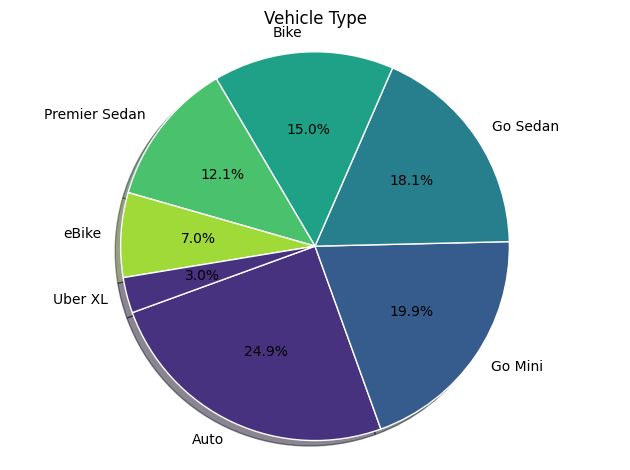

In [ ]:
plt.pie(Vehicle_Type,labels=Vehicle_Type.index,autopct='%1.1f%%',startangle=200,shadow=90,wedgeprops={"edgecolor":"white"},colors=sns.color_palette("viridis"))
plt.title("Vehicle Type")
plt.tight_layout()
plt.axis("equal")
plt.show()

###**Checking the Payment Method...**

In [ ]:
Payment_Method=df.groupby("Payment Method")["Payment Method"].count().sort_values(ascending=False)
Payment_Method

,Payment Method
Payment Method,
0,48000
UPI,45909
Cash,25367
Uber Wallet,12276
Credit Card,10209
Debit Card,8239


###**Visualizing payment method through a Pie Chart...**

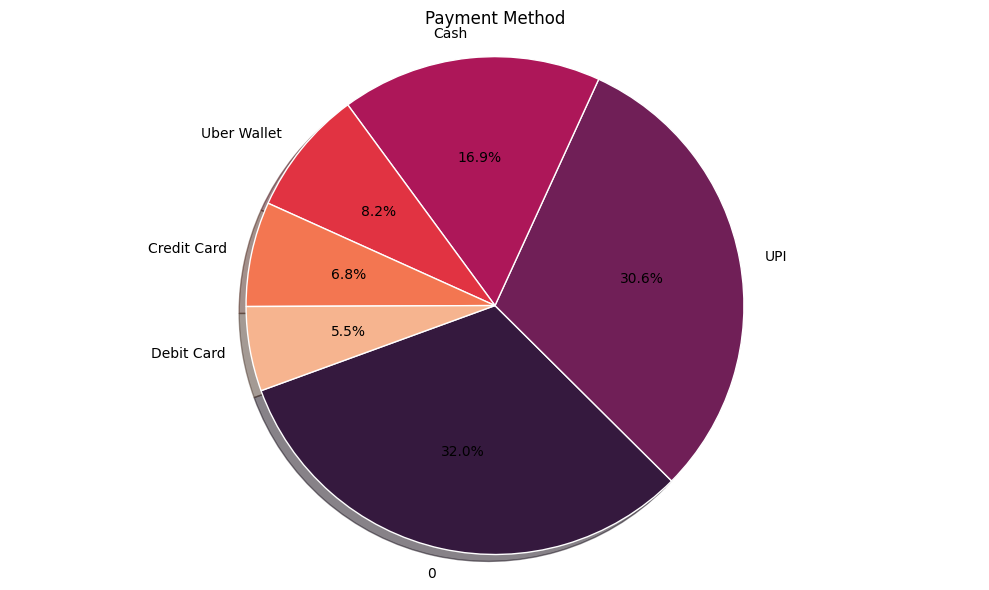

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(Payment_Method,labels=Payment_Method.index,autopct="%1.1f%%",startangle=200,shadow=True,wedgeprops={"edgecolor":"white"},colors=sns.color_palette("rocket"))
plt.title("Payment Method")
plt.tight_layout()
plt.axis("equal")
plt.show()

In [ ]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method',
       'Monthly Sales Trends'],
      dtype='object')

###**Showing Average Booking Value by Vehicle Type...**

In [ ]:
Avg_booking_value=df.groupby("Vehicle Type")["Booking Value"].mean().sort_values(ascending=False)
Avg_booking_value

,Booking Value
Vehicle Type,
Bike,348.079096
Go Mini,346.859558
Premier Sedan,346.492850
Go Sedan,345.223794
Auto,344.167990
Uber XL,343.455158
eBike,342.756939


###**Visualizing Average Booking Value through a bar chart...**

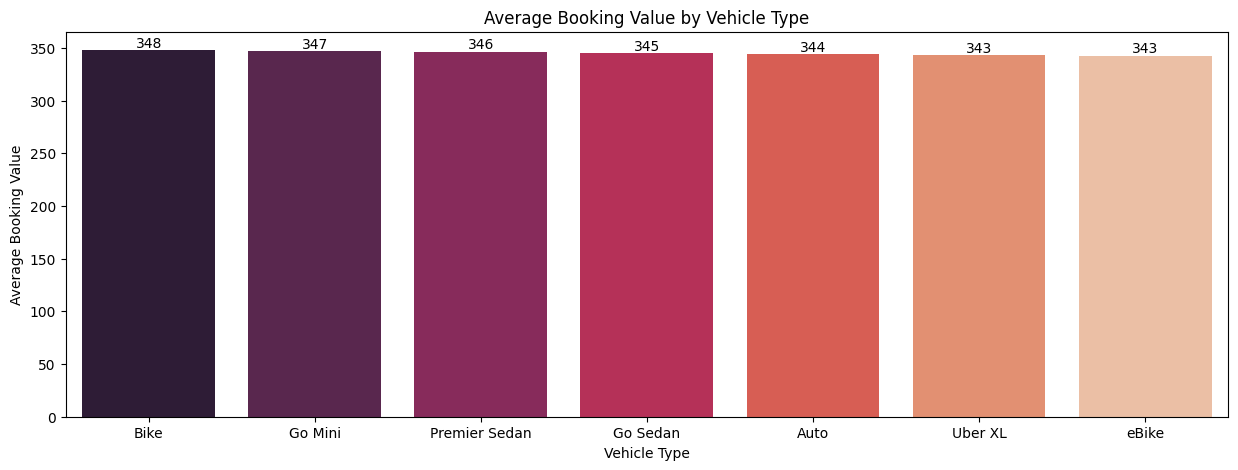

In [ ]:
plt.figure(figsize=(15,5))
a=sns.barplot(x=Avg_booking_value.index, y=Avg_booking_value.values, palette="rocket")
plt.title("Average Booking Value by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Average Booking Value")
plt.xticks(rotation=0)

for bar in a.patches:
  a.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),f'{bar.get_height():.0f}', ha='center', va='bottom')
plt.show()

###**Showing the Correlation between "Ride Distance" & "Booking Value"**

In [ ]:
df["Correlation between ride & booking"]=df["Ride Distance"].corr(df["Booking Value"])
df["Correlation between ride & booking"]

,Correlation between ride & booking
0,0.417591
1,0.417591
2,0.417591
3,0.417591
4,0.417591
...,...
149995,0.417591
149996,0.417591
149997,0.417591
149998,0.417591


###**Visualizing the Correlation between "Ride Distance" & "Booking Value through a heatmap"**

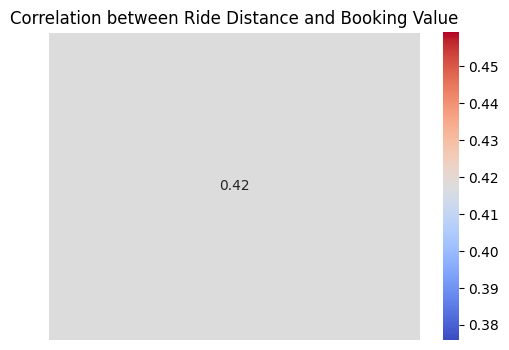

In [ ]:
correlation_value = df["Ride Distance"].corr(df["Booking Value"])

plt.figure(figsize=(6, 4))
sns.heatmap([[correlation_value]], annot=True, cmap='coolwarm',linewidths=.5)
plt.title("Correlation between Ride Distance and Booking Value")
plt.xticks([])
plt.yticks([])
plt.show()

#**Summary Highlights...**

###**Changing the data types of "Date" from "Object type" to "date&time type"**

###**Replacing the null values with "0"**

###**Monthly Sales Trends: Maximum sales happend in the month of July(12,897) , Jan(12,861) & May(12,778)**

###**Minimum sales happend in the month of Feb(11,927) , April(12,199) & Sep(12,248)**

###**Booking Status: Booking Copeleted (93,000) , Booking Cancelled by driver(27,000) , Booking cancelled by customer(10,500) , No driver found(10,500) & Incomplete(9,000)**

###**Vehicle Used: Auto(24.9%) , Go Mini(19.9%) , Go Sedan(18.1%) , Bike(15.0%) , Premier Sedan(12.1%) , Ebike(7.0%) & UberXL(3.0%)**

###**Payment Method: Payment method not found(32.0%) , UPI(30.6%) , Cash(16.9%) , Uber Wallet(8.2%) , Credit Card(6.8%) & Debit Card(5.5%)**

###**The correlation between "Ride Distance" and "Booking Value" is  0.42**

###**Average Driver rating: 2.62 & Average Customer rating: 2.73**